In [59]:
# Web scraping to obtain EPL historical data from https://fbref.com/en/comps/9/history/Premier-League-Seasons

import requests
from bs4 import BeautifulSoup
import pandas as pd

# webpage for webscraping 
url = "https://fbref.com/en/comps/9/history/Premier-League-Seasons"

# using the GET request function 
response = requests.get(url)
response.raise_for_status()  #to ensure that the GET request was successful before proceeding

# processing the contenst of the html
soup = BeautifulSoup(response.content, 'html.parser')

# to get the table which contains the data for each season using the find function 
table = soup.find('table', {'id': 'seasons'})

# hence the headers and rows of the table should be extracted 
headers = [th.text for th in table.find('thead').find_all('th')]
rows = []
for row in table.find('tbody').find_all('tr'):
    cells = row.find_all('td')
    if cells:
        rows.append([cell.text.strip() for cell in cells])

# Create a DataFrame for the data scraped 
df = pd.DataFrame(rows, columns=headers[1:])  # Exclude the first header as it is for row numbers

# therefore the dataframe should be displayed 
print(df)

                   Competition Name # Squads                Champion  \
0                    Premier League       20                           
1                    Premier League       20    Manchester City - 91   
2                    Premier League       20    Manchester City - 89   
3                    Premier League       20    Manchester City - 93   
4                    Premier League       20    Manchester City - 86   
..                              ...      ...                     ...   
121  Football League First Division       16         Sunderland - 48   
122                 Football League       14         Sunderland - 42   
123                 Football League       12            Everton - 29   
124                 Football League       12  Preston North End - 33   
125                 Football League       12  Preston North End - 40   

                            Top Scorer  
0                                       
1                  Erling Haaland - 27  
2           

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
file_path = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\14-15.csv"
data = pd.read_csv(file_path)



# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  Div      Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  16-08-14     Arsenal  Crystal Palace     2     1   H     1     1   D   
1  E0  16-08-14   Leicester         Everton     2     2   D     1     2   A   
2  E0  16-08-14  Man United         Swansea     1     2   A     0     1   A   
3  E0  16-08-14         QPR            Hull     0     1   A     0     0   D   
4  E0  16-08-14       Stoke     Aston Villa     0     1   A     0     0   D   

   ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  ...   6    2  13  19   9   3   2   2   0   1  
1  ...   3    3  16  10   3   6   1   1   0   0  
2  ...   5    4  14  20   4   0   2   4   0   0  
3  ...   6    4  10  10   8   9   1   2   0   0  
4  ...   2    2  14   9   2   8   0   3   0   0  

[5 rows x 23 columns]


In [66]:
# preprocessing of data dowloaded from https://www.football-data.co.uk/englandm.php

import os
import pandas as pd

# the data for each season was downloaded in different csv files.
# the section combines all the csv files in a single file


# Defining the file path/directory cwhere the data files are (csv files)
directory = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset"

# An empty list is initialised to hold the DataFrames
dataframes = []

# Iterating through each file in the path 
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames into one DataFrame
New_combined_df = pd.concat(dataframes, ignore_index=True)

# Hence the new path where the new CSV will be located (the new combined dataset)
output_path = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\New_combined_dataset.csv"

# Save the combined DataFrame to a single CSV file
New_combined_df.to_csv(output_path, index=False)

print(f"New_Combined CSV file saved at: {output_path}")

# Display the first few rows of the new combined dataset 
print(df.head())

New_Combined CSV file saved at: C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\New_combined_dataset.csv
  Div        Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  11/08/2023  20:00      Burnley       Man City     0     3   A     0   
1  E0  12/08/2023  12:30      Arsenal  Nott'm Forest     2     1   H     2   
2  E0  12/08/2023  15:00  Bournemouth       West Ham     1     1   D     0   
3  E0  12/08/2023  15:00     Brighton          Luton     4     1   H     1   
4  E0  12/08/2023  15:00      Everton         Fulham     0     1   A     0   

   HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0     2  ...     2.28  1.50      1.95      1.98   1.95   1.97      NaN   
1     0  ...     2.63 -2.00      1.95      1.98   1.93   1.97     2.01   
2     0  ...     2.12  0.00      2.02      1.91   2.01   1.92     2.06   
3     0  ...     2.48 -1.75      2.01      1.92   2.00   1.91     2.14   
4     0  ...     1.71 -0.25      2.06    

In [80]:
# DATA CLEANING 
# Cleaning the new combined dataset

import pandas as pd

# Load the dataset from the directory to inspect the data then print the first few rows to check
Data_path = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\New_combined_dataset.csv"
df = pd.read_csv(Data_path)
print(df.head())

# Drop columns that are not needed (the columns show the odds for different bet companies)
drop_columns = [
    'Div', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 
    'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 
    'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 
    'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'Time', 
    'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 
    'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 
    'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 
    'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 
    'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 
    'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 
    'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA'
]

# Drop the columns
df = df.drop(columns=drop_columns)

# Display the first few rows of the updated DataFrame to confirm that the columns were dropped
print(df.head())

  Div      Date    HomeTeam        AwayTeam  Full Time HomeTeam Goal  \
0  E0  16-08-14     Arsenal  Crystal Palace                        2   
1  E0  16-08-14   Leicester         Everton                        2   
2  E0  16-08-14  Man United         Swansea                        1   
3  E0  16-08-14         QPR            Hull                        0   
4  E0  16-08-14       Stoke     Aston Villa                        0   

   Full Time AwayTeam Goal Full Time Result  Half Time HomeTeam Goal  \
0                        1                H                        1   
1                        2                D                        1   
2                        2                A                        0   
3                        1                A                        0   
4                        1                A                        0   

   Half Time AwayTeam Goal Half Time Result  ... AvgC<2.5  AHCh  B365CAHH  \
0                        1                D  ...      NaN

In [81]:
# Handling missing values by checking through the dataset and ensuring it contains the appropriate data types

# Check through the data if there are duplicate rows or columns
print(df.duplicated().sum())

# then Check for missing values
print(df.isnull().sum())

# Check through to Inspect the datatypes 
print(df.dtypes)

# Drop rows that have missing values 
df = df.dropna(axis=0, how='any')

# confirm if there are no more missing values
print(df.isnull().sum())


# To be double sure, print the length of specific columns 
column_name = 'Half Time HomeTeam Goal' 
column = df[column_name]
print(f"The length of the column '{column_name}' is: {len(column)}")

# check the characteristics of the new data and display the first few rows of the data
print("The first few rows of the dataset:")
print(df.head())

# Hence, using the for loop check the length of all columns to ensure they are the same 
for column in df.columns:
    print(f"The length of the column '{column}' is: {len(df[column])}")
    
# Save the new cleaned data to a csv file
df.to_csv(r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Cleaned_Dataset.csv", index=False)

0
Date                        0
HomeTeam                    0
AwayTeam                    0
Full Time HomeTeam Goal     0
Full Time AwayTeam Goal     0
Full Time Result            0
Half Time HomeTeam Goal     0
Half Time AwayTeam Goal     0
Half Time Result            0
Referee                     0
HomeTeam Shots              0
AwayTeam Shots              0
HomeTeam Shots on Target    0
AwayTeam Shots on Target    0
HomeTeam Fouls Committed    0
AwayTeam Fouls Committed    0
HomeTeam Corners            0
AwayTeam Corners            0
HomeTeam Yellow Cards       0
AwayTeam Yellow Cards       0
HomeTeam Red Cards          0
AwayTeam Red Cards          0
dtype: int64
Date                        object
HomeTeam                    object
AwayTeam                    object
Full Time HomeTeam Goal      int64
Full Time AwayTeam Goal      int64
Full Time Result            object
Half Time HomeTeam Goal      int64
Half Time AwayTeam Goal      int64
Half Time Result            object
Referee   

In [122]:
# FEATURE ENGINEERING- In this section, new features will be created to provide better data input for the models 


# create a new feature to capture the period which the matches were played (such as day of the week and month) 
# To ensure the date column is in datetime format
import pandas as pd

# Load the dataset
Data_path = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Cleaned_Dataset.csv"
df = pd.read_csv(Data_path)

df['Date'] = pd.to_datetime(df['Date'])

# The date based features are extracted 
df['match_month'] = df['Date'].dt.month
df['match_weekday'] = df['Date'].dt.weekday



# The matchday is categorised into weekdays or weekends by creating a new function 
def Weekday_category(day):
    if day >= 5:  # with saturday being (5) and sunday (6)
        return 'Weekend'
    else:
        return 'Weekday'

# Create a new column "matchday category" 
df['matchday_category'] = df['Date'].dt.weekday.apply(Weekday_category)

# Review
print(df[['Date', 'matchday_category']].head())


# create a new feature goal difference 
df['Goal_Difference'] = df['Full Time HomeTeam Goal'] - df['Full Time AwayTeam Goal']


# create a new feature total goals 
df['Total_Goals'] = df['Full Time HomeTeam Goal'] + df['Full Time AwayTeam Goal']


print(df.head())

df.to_csv(r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Newfeatured_Dataset.csv", index=False) 

        Date matchday_category
0 2014-08-16           Weekend
1 2014-08-16           Weekend
2 2014-08-16           Weekend
3 2014-08-16           Weekend
4 2014-08-16           Weekend
        Date    HomeTeam        AwayTeam  Full Time HomeTeam Goal  \
0 2014-08-16     Arsenal  Crystal Palace                        2   
1 2014-08-16   Leicester         Everton                        2   
2 2014-08-16  Man United         Swansea                        1   
3 2014-08-16         QPR            Hull                        0   
4 2014-08-16       Stoke     Aston Villa                        0   

   Full Time AwayTeam Goal Full Time Result  Half Time HomeTeam Goal  \
0                        1                H                        1   
1                        2                D                        1   
2                        2                A                        0   
3                        1                A                        0   
4                        1             

C:\Users\HP\AppData\Local\Temp\ipykernel_1608\3920815199.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


       Full Time HomeTeam Goal  Full Time AwayTeam Goal  \
count              3800.000000              3800.000000   
mean                  1.547895                 1.245263   
std                   1.320389                 1.202504   
min                   0.000000                 0.000000   
25%                   1.000000                 0.000000   
50%                   1.000000                 1.000000   
75%                   2.000000                 2.000000   
max                   9.000000                 9.000000   

       Half Time HomeTeam Goal  Half Time AwayTeam Goal  HomeTeam Shots  \
count              3800.000000              3800.000000     3800.000000   
mean                  0.693421                 0.555000       14.004211   
std                   0.848924                 0.766244        5.732658   
min                   0.000000                 0.000000        0.000000   
25%                   0.000000                 0.000000       10.000000   
50%               

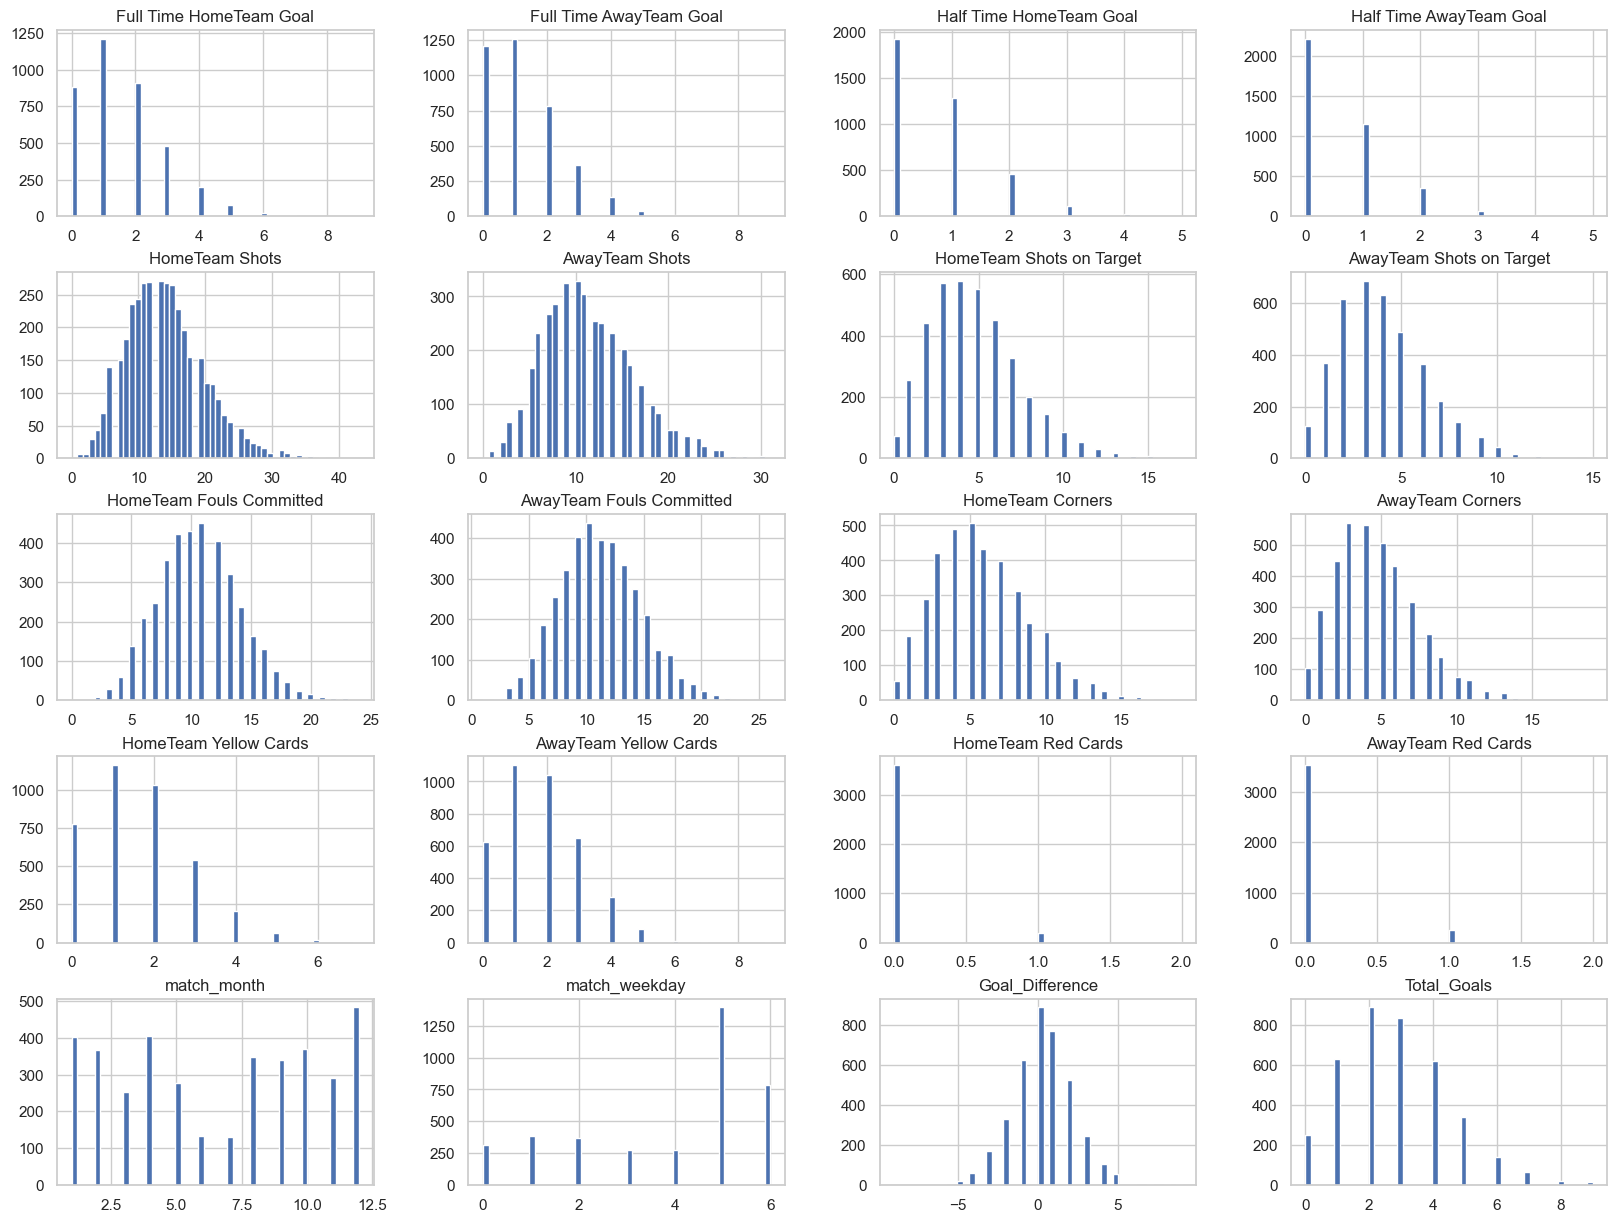

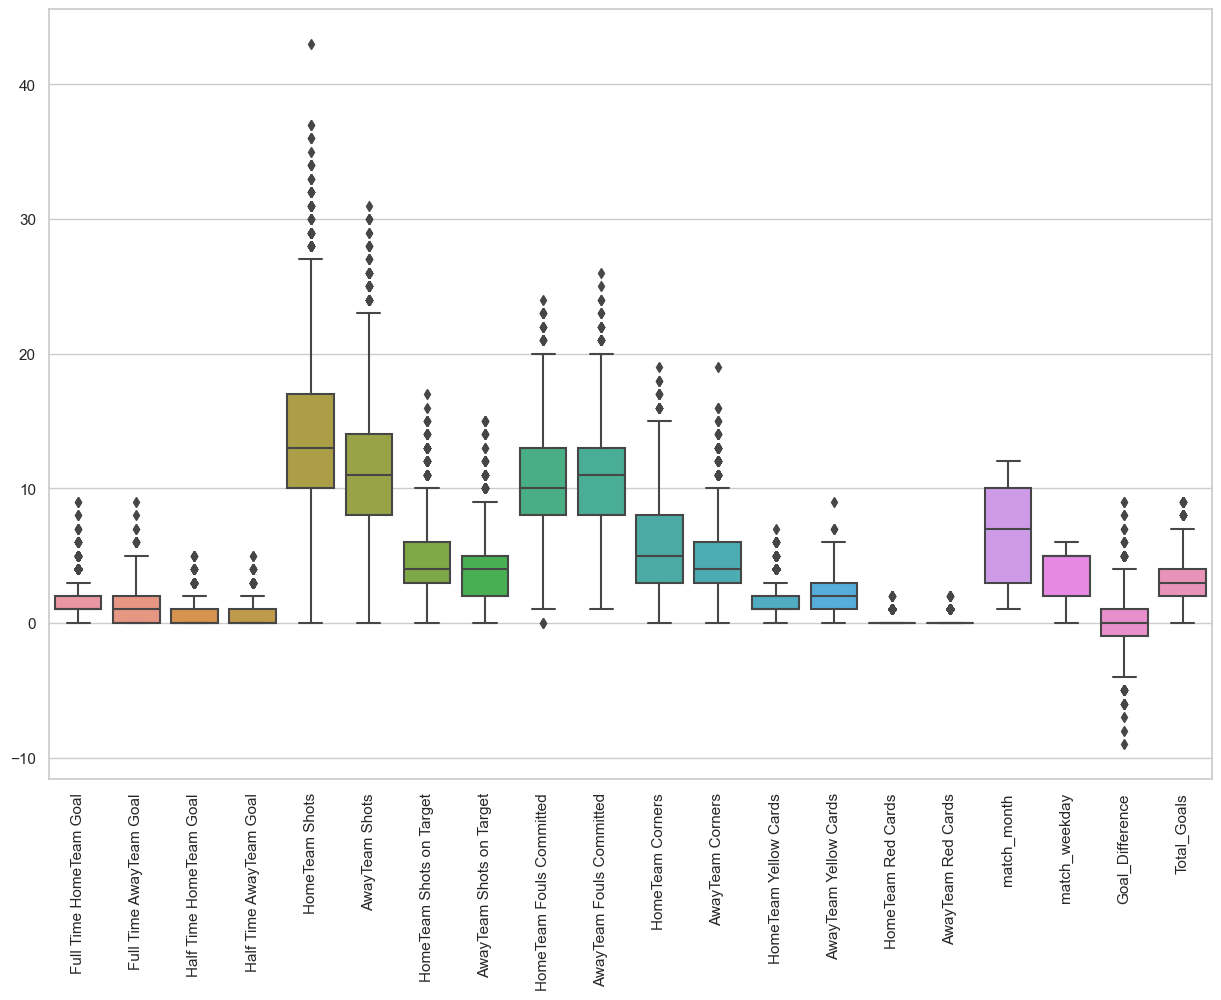

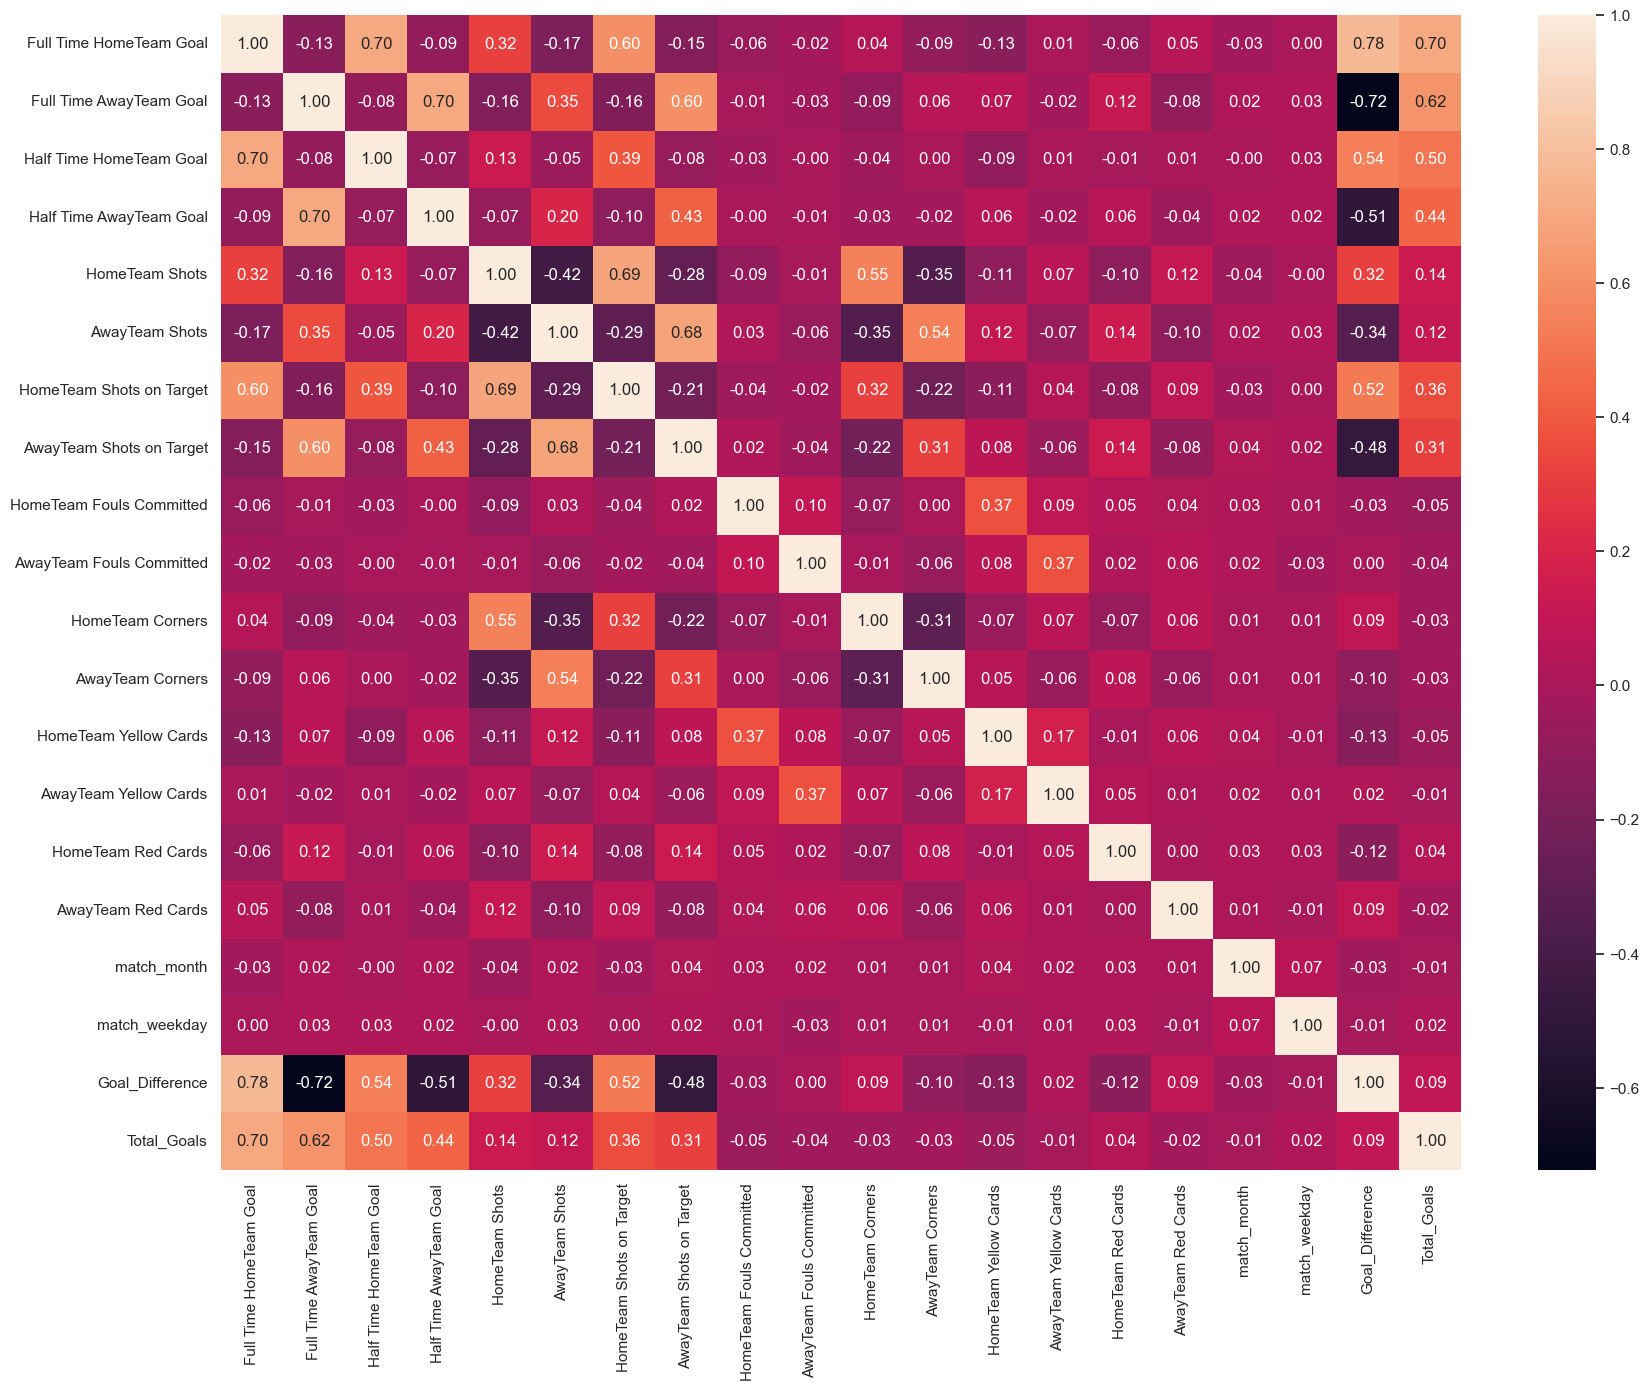

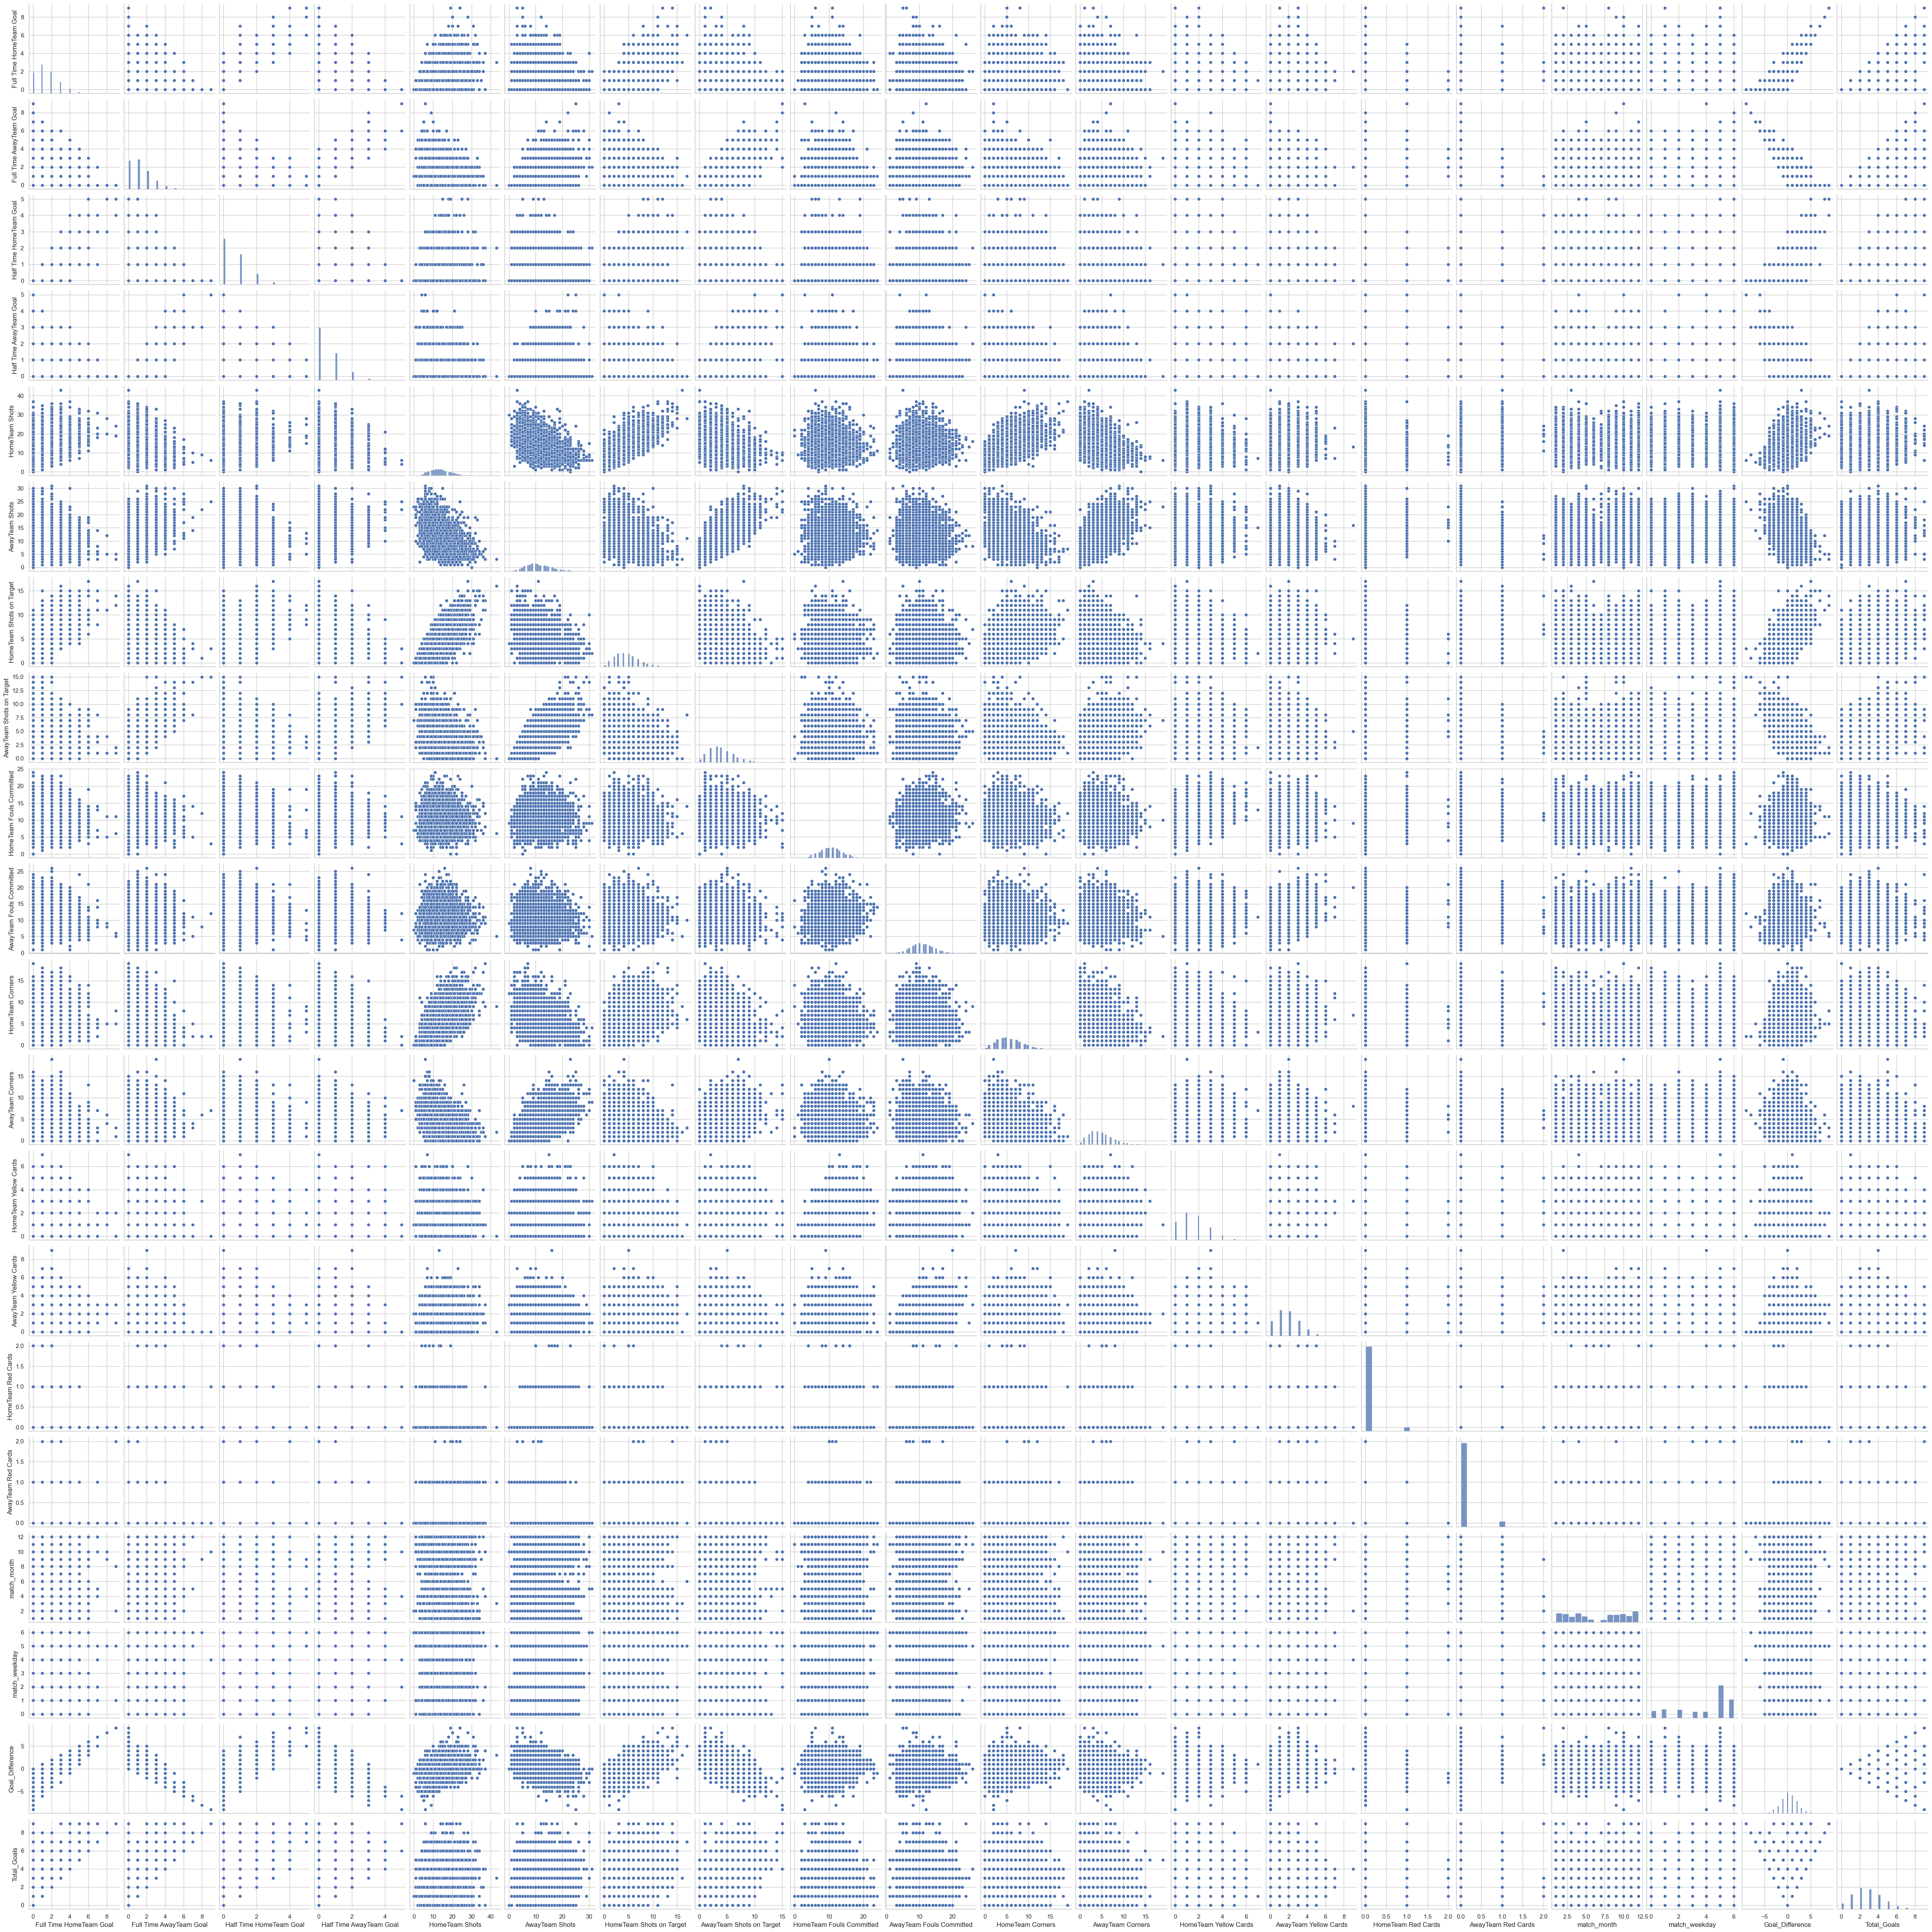

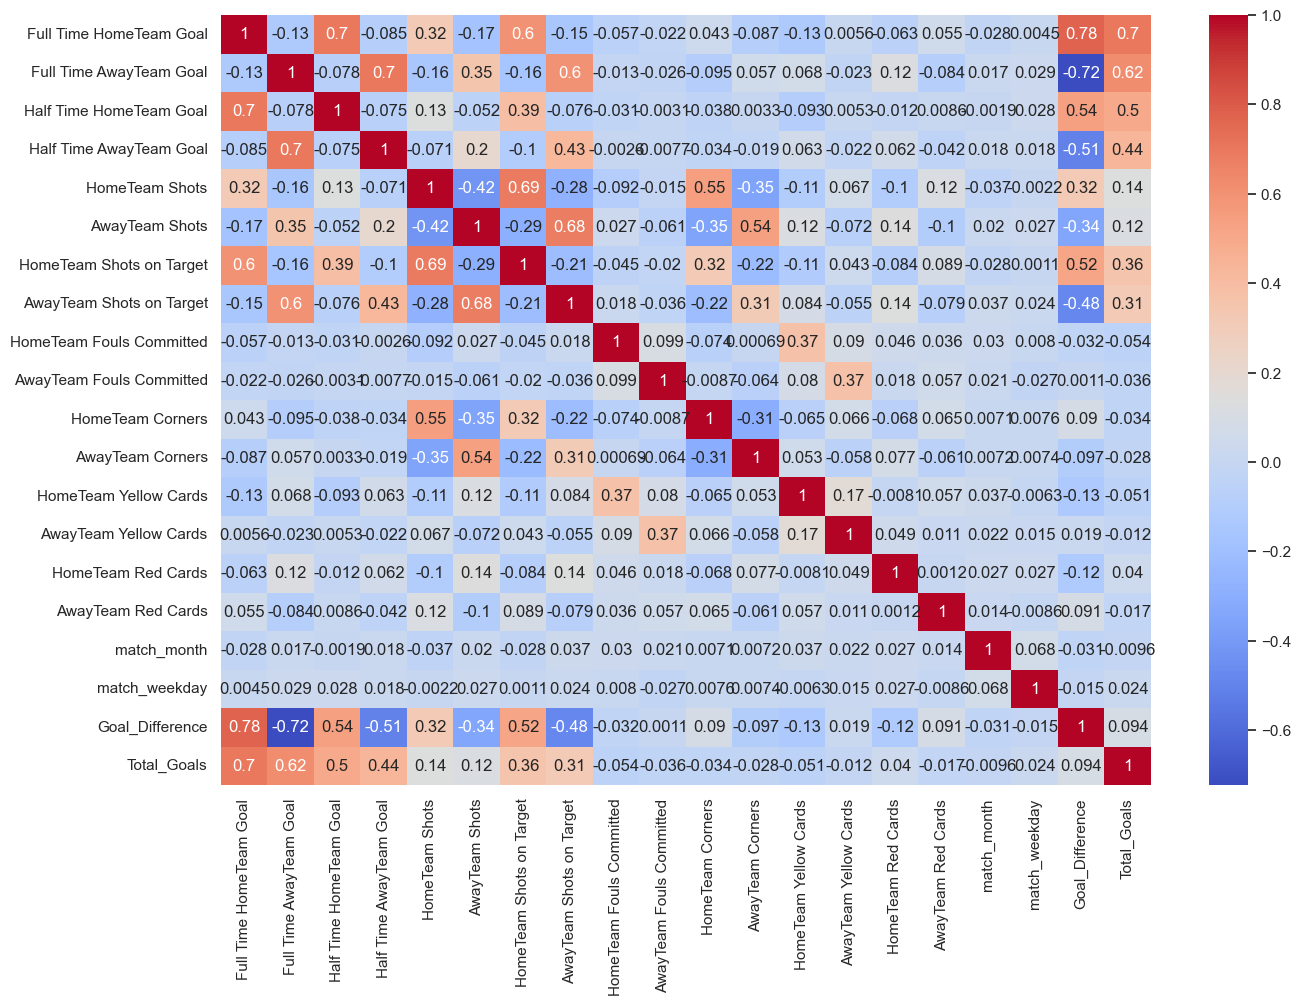

Counts for column 'Date':
2024-05-19    10
2023-05-28    10
2019-12-05    10
2015-01-01    10
2020-07-26    10
              ..
2022-02-25     1
2022-02-24     1
2019-01-04     1
2022-02-15     1
2017-02-26     1
Name: Date, Length: 1125, dtype: int64


Counts for column 'HomeTeam':
Arsenal             190
Liverpool           190
Man City            190
Tottenham           190
Everton             190
Chelsea             190
Crystal Palace      190
West Ham            190
Man United          190
Southampton         171
Leicester           171
Newcastle           171
Burnley             152
Bournemouth         133
Brighton            133
Aston Villa         133
Watford             114
Wolves              114
West Brom            95
Swansea              76
Stoke                76
Fulham               76
Brentford            57
Sheffield United     57
Leeds                57
Sunderland           57
Norwich              57
Huddersfield         38
Hull                 38
Nott'm Forest       

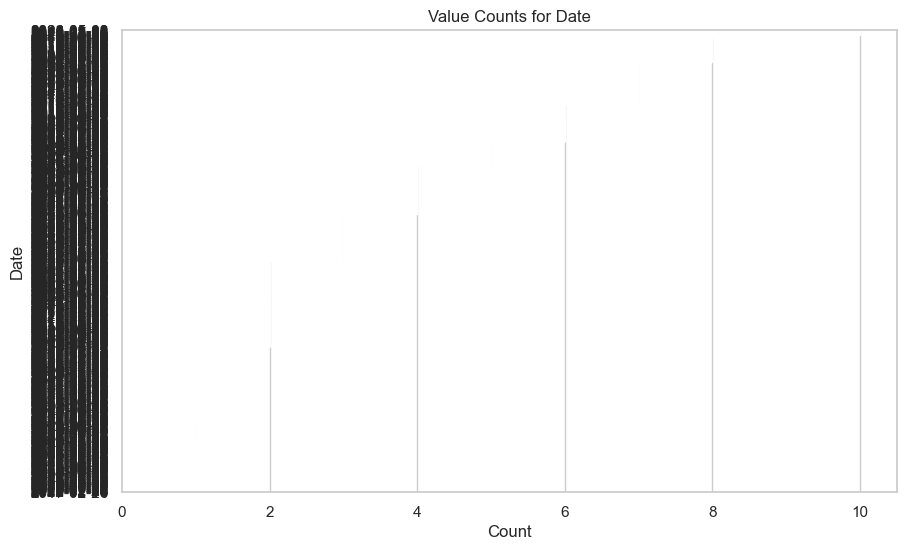

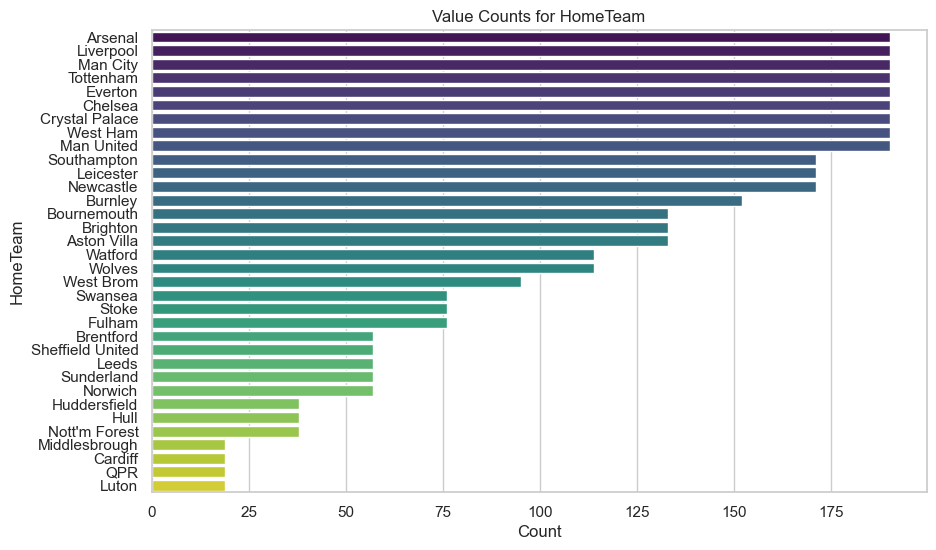

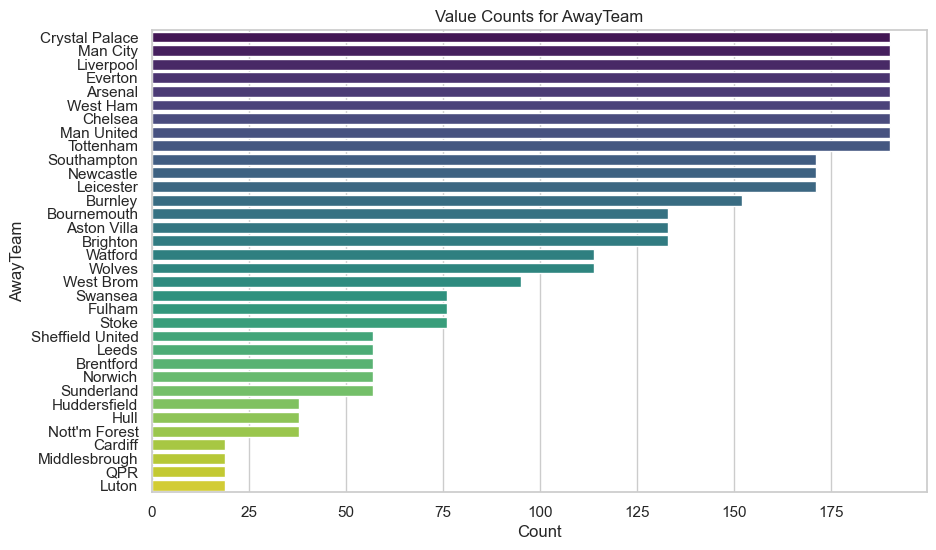

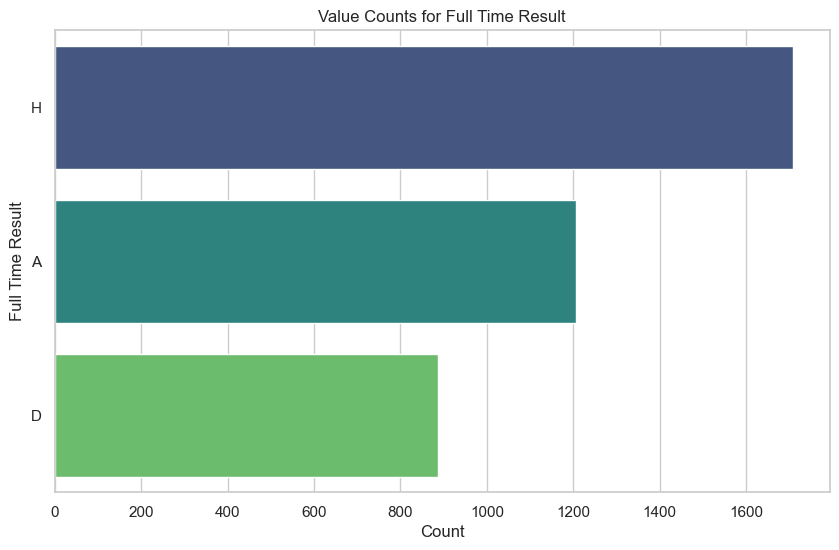

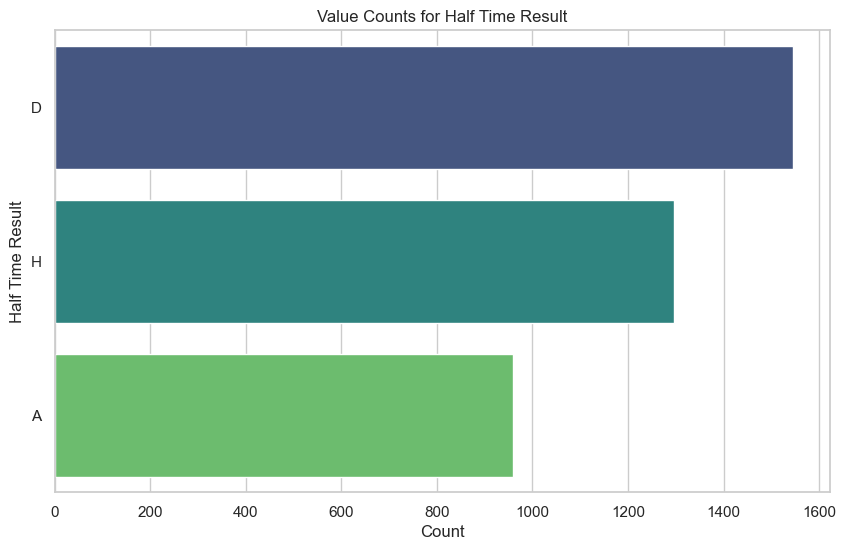

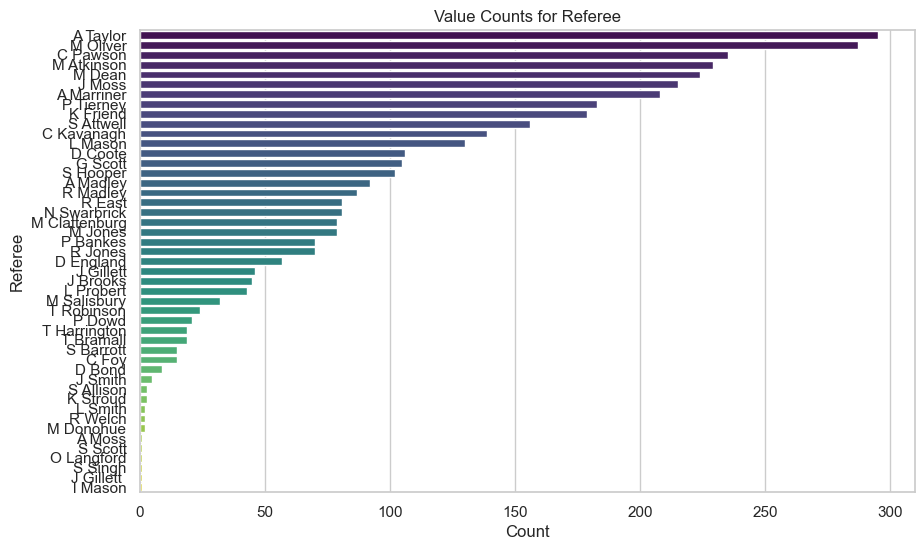

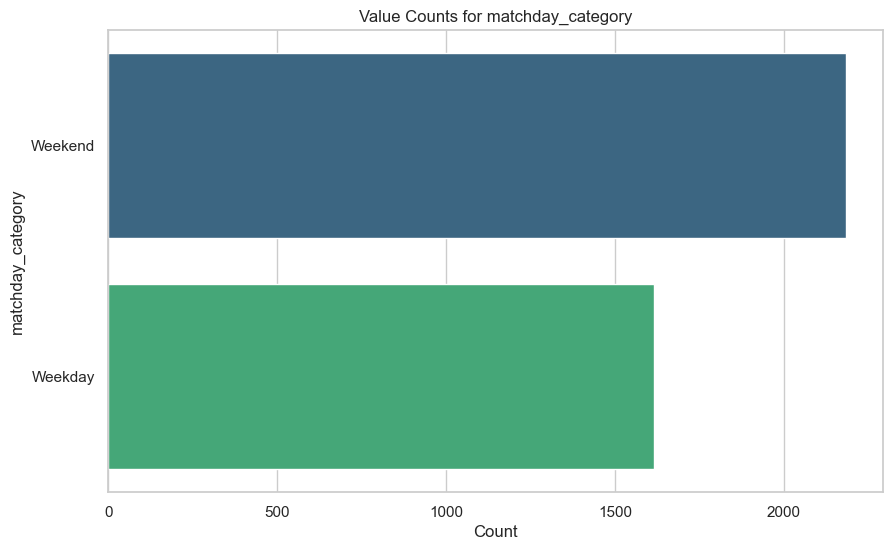

In [123]:
# EXPLORATORY DATA ANALYSIS

df = pd.read_csv(r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Newfeatured_Dataset.csv")
df

# The first step is to get the summary statistics to understand data distribution 
print(df.describe())

# Then the patterns, correlation and outliers are identified using visualisation 

# import libriries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Numerical features
# Histograms to identify the distribution of numerical features
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap for relationship between features
plt.figure(figsize=(20, 15))
Numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(Numeric_df.corr(), annot=True, fmt='.2f')
plt.show()


# Bivariate analysis to show the relationship between two variables
# scatterplot plot
sns.pairplot(Numeric_df)
plt.show()    
    
# correlation analysis    
plt.figure(figsize=(15, 10))
sns.heatmap(Numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()    

# categorical features

# Identify the categorical features
Categorical_features = df.select_dtypes(include=['object']).columns

# Count the unique values in each categorical feature
Categorical_counts = {col: df[col].value_counts() for col in Categorical_features}

# Display the counts for each Categorical features column
for col, counts in Categorical_counts.items():
    print(f"Counts for column '{col}':")
    print(counts)
    print("\n")


# Visualisation for the the categorical feature count     
# The visualisation style 
sns.set(style="whitegrid")

# Bar plots for each Categorical_features column
for col, counts in Categorical_counts.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.values, y=counts.index, palette="viridis")
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()    


In [124]:
# The One-hot encoding technique is used to encode the categorical variables into numerical varaibles
df = pd.read_csv(r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Newfeatured_Dataset.csv")
df = pd.get_dummies(df, drop_first=True)

# Feature scaling 
# Normalising the numerical variable to ensure they are on the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

Full Time HomeTeam Goal  Full Time AwayTeam Goal  \
0                    0.342448                -0.203987   
1                    0.342448                 0.627720   
2                   -0.415004                 0.627720   
3                   -1.172456                -0.203987   
4                   -1.172456                -0.203987   
...                       ...                      ...   
3795                 2.614804                -1.035695   
3796                 0.342448                -1.035695   
3797                 0.342448                 2.291135   
3798                 1.099900                -0.203987   
3799                -1.172456                 1.459428   

      Half Time HomeTeam Goal  Half Time AwayTeam Goal  HomeTeam Shots  \
0                    0.361186                 0.580832       -0.000735   
1                    0.361186                 1.886071       -0.524121   
2                   -0.816931                 0.580832       -0.000735   
3                   -0.816931                -0.724408        0.871576   
4                   -0.816931                -0.724408       -0.349659   
...                       ...                      ...             ...   
3795                 1.539302                -0.724408        0.173728   
3796                 1.539302                -0.724408        3.837432   
3797                 0.361186                 1.886071        0.173728   
3798                 1.539302                 0.580832        2.441735   
3799                -0.816931                 0.580832       -1.396431   

      AwayTeam Shots  HomeTeam Shots on Target  AwayTeam Shots on Target  \
0          -1.493050                  0.464389                 -0.840288   
1           0.319534                 -0.668025                 -0.412889   
2          -1.291651                  0.086918                  0.014509   
3          -0.083262                  0.464389                  0.014509   
4          -0.888855                 -1.045497                 -0.840288   
...              ...                       ...                       ...   
3795       -0.687457                  1.596804                 -0.840288   
3796       -1.493050                  3.484162                 -0.412889   
3797        0.722331                  0.464389                  1.296704   
3798       -1.694448                  2.729218                 -0.840288   
3799        1.326525                 -1.422968                  2.151500   

      HomeTeam Fouls Committed  AwayTeam Fouls Committed  ...  \
0                     0.704750                  2.259071  ...   
1                     1.579930                 -0.261079  ...   
2                     0.996476                  2.539088  ...   
3                    -0.170430                 -0.261079  ...   
4                     0.996476                 -0.541095  ...   
...                        ...                       ...  ...   
3795                 -0.170430                 -0.821112  ...   
3796                  0.996476                  0.018938  ...   
3797                  1.288203                  2.539088  ...   
3798                 -2.212516                  0.298955  ...   
3799                  0.121297                 -0.541095  ...   

      Referee_S Attwell  Referee_S Barrott  Referee_S Hooper  Referee_S Scott  \
0                     0                  0                 0                0   
1                     0                  0                 0                0   
2                     0                  0                 0                0   
3                     0                  0                 0                0   
4                     0                  0                 0                0   
...                 ...                ...               ...              ...   
3795                  0                  0                 0                0   
3796                  0                  0                 0                0 

In [127]:
# Install the libraries to be used 
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow


# Load the libraries to be used

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


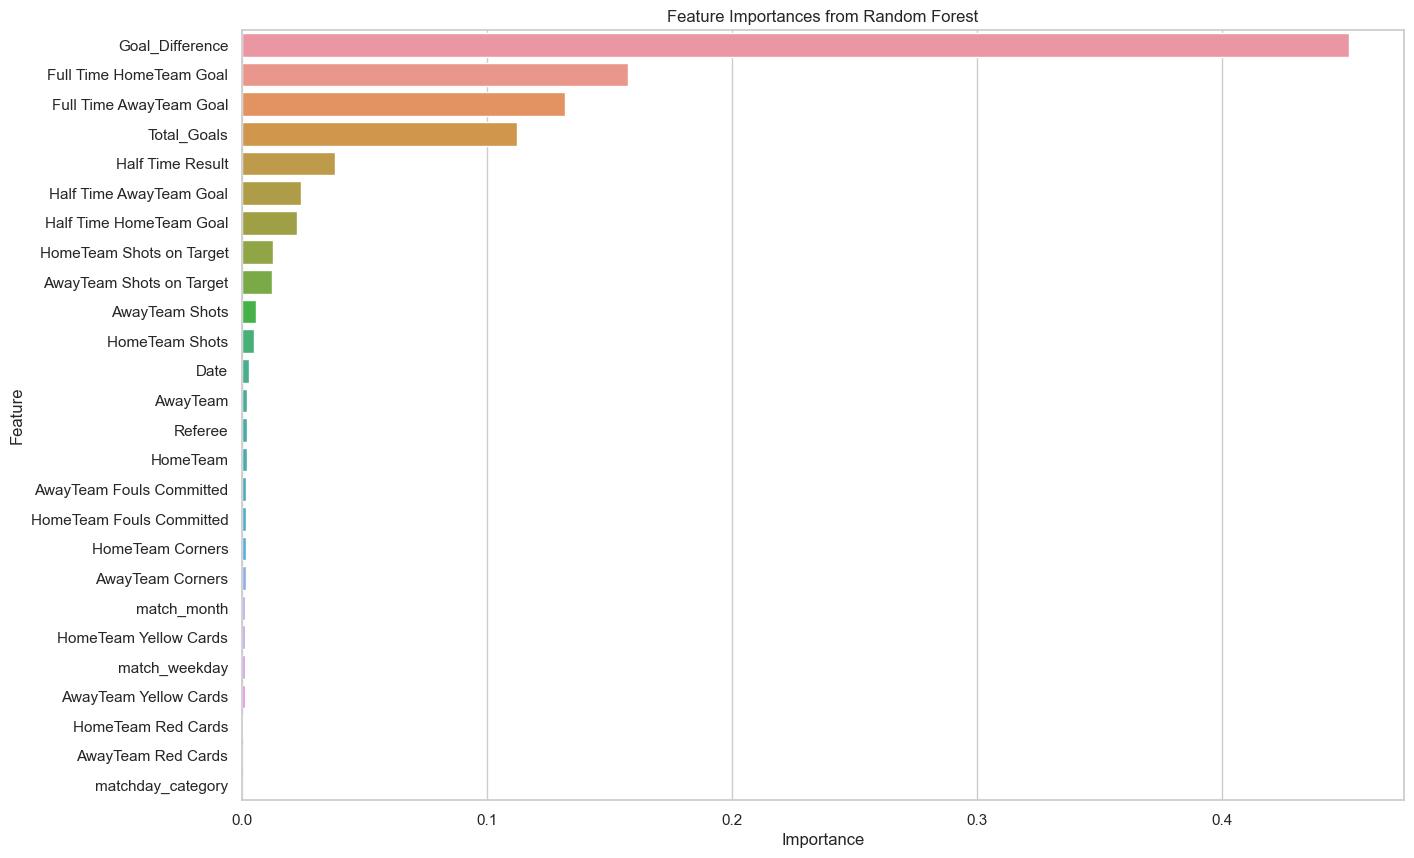

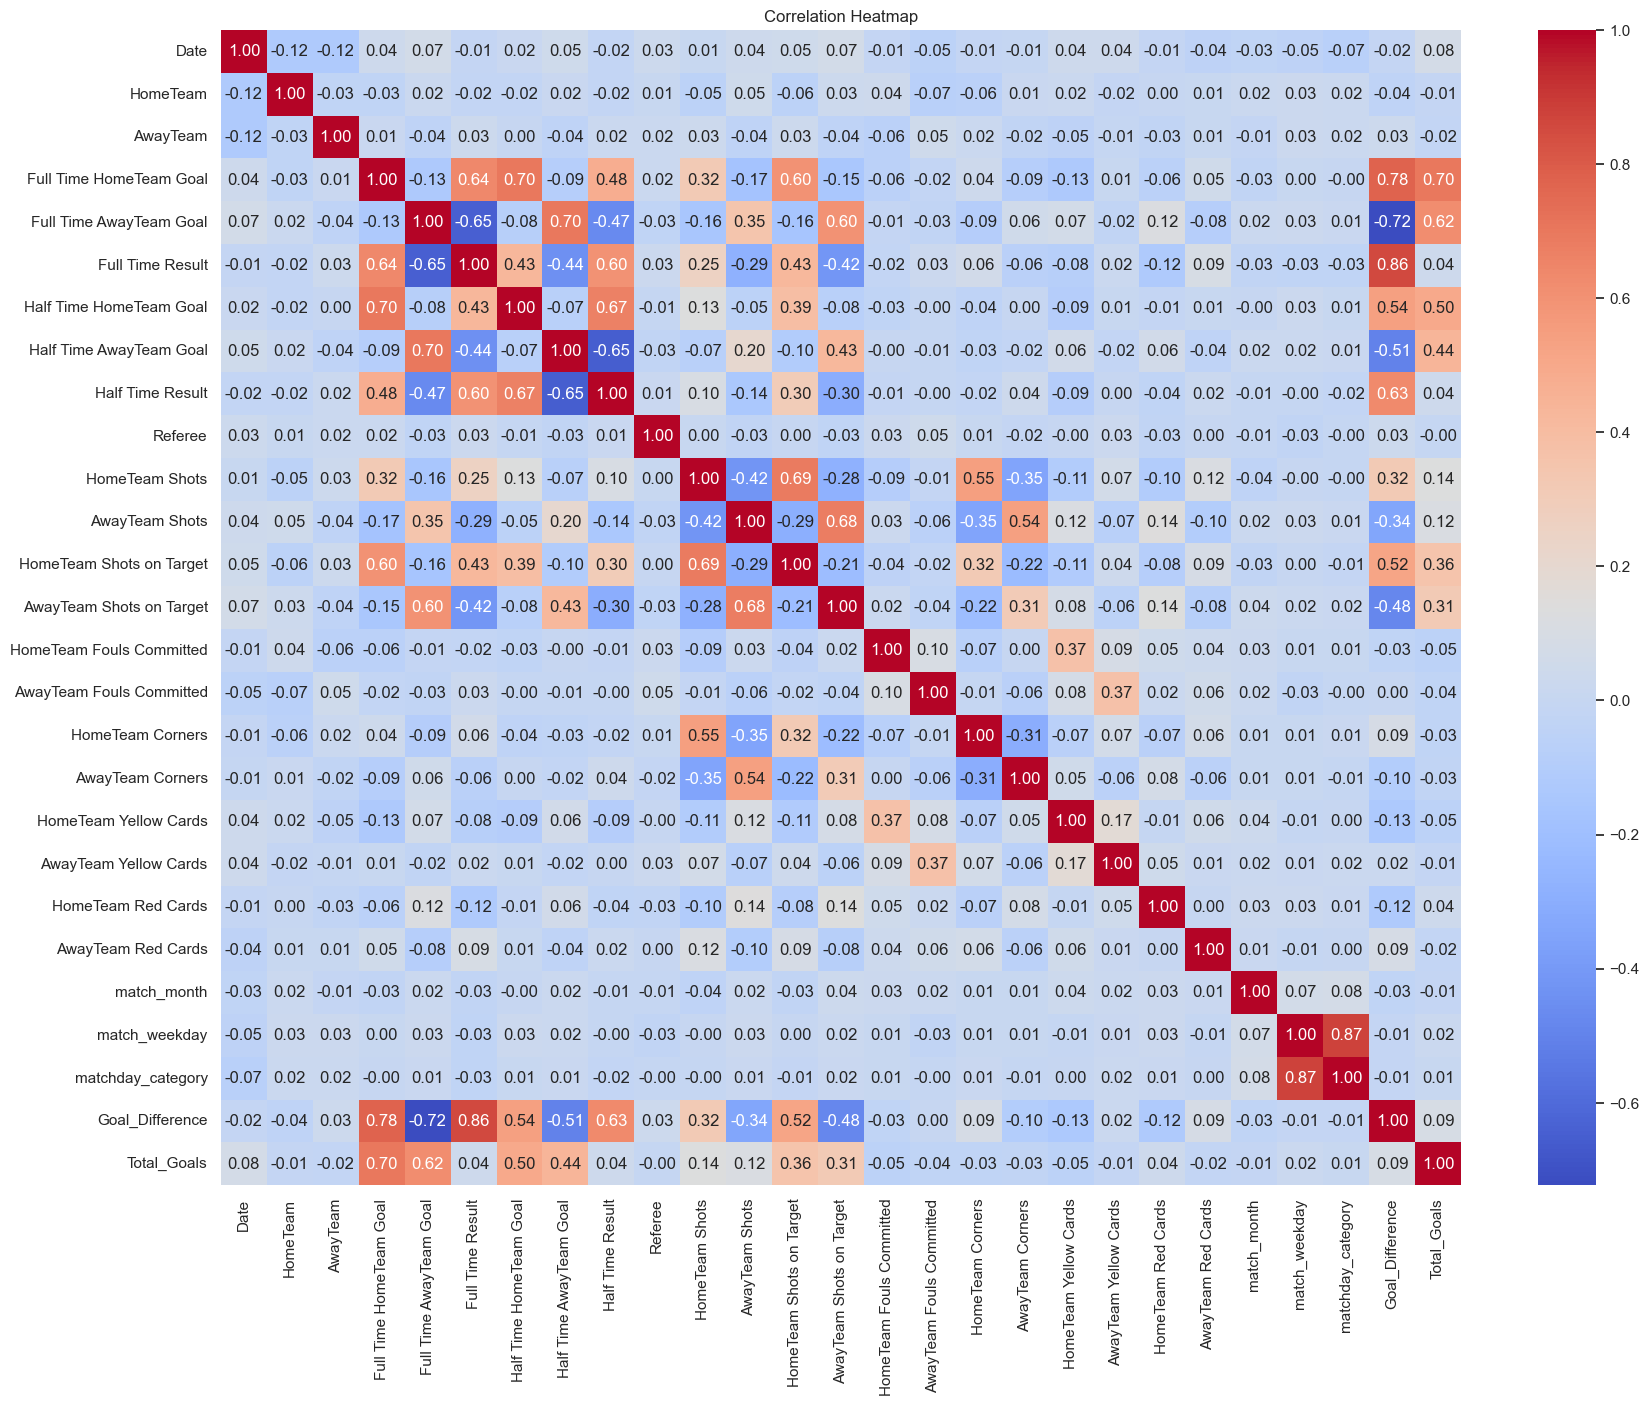

Selected Features: ['Goal_Difference', 'Full Time HomeTeam Goal', 'Full Time AwayTeam Goal', 'Total_Goals', 'Half Time Result', 'Half Time AwayTeam Goal', 'Half Time HomeTeam Goal', 'HomeTeam Shots on Target', 'AwayTeam Shots on Target', 'AwayTeam Shots', 'HomeTeam Shots', 'Date', 'AwayTeam', 'Referee', 'HomeTeam', 'AwayTeam Fouls Committed', 'HomeTeam Fouls Committed', 'HomeTeam Corners', 'AwayTeam Corners', 'match_month', 'HomeTeam Yellow Cards', 'match_weekday', 'AwayTeam Yellow Cards', 'HomeTeam Red Cards', 'AwayTeam Red Cards']


In [128]:
# FEATURE SELECTION 

# Load the dataset
Data_path = r"C:\Users\HP\OneDrive - University of Hertfordshire\EPL Dataset\Newfeatured_Dataset.csv"
df = pd.read_csv(Data_path)


# Encode all categorical variables
label_encoder = LabelEncoder()

categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])


# Define the target variable and feature set
target = 'Full Time Result'
features = df.drop(columns=[target])

# Ensure the target variable is also label encoded for classification
df[target] = label_encoder.fit_transform(df[target])

# Define the feature matrix (X) and the target vector (y)
X = df[features.columns]
y = df[target]

# Train a Random Forest model to determine feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Selecting features based on importance and correlation analysis
selected_features = feature_importances['Feature'].tolist()

# Removing features with high correlation (multicollinearity)
corr_matrix = df[selected_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop the features identified
selected_features = [feature for feature in selected_features if feature not in to_drop]

# Display the selected features
print("Selected Features:", selected_features)